In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

In [7]:
df = pd.read_csv('./Chapter_1_cleaned_data.csv')

In [8]:
df['default payment next month'].mean()

0.2217971797179718

In [9]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
my_lr = LogisticRegression()

In [13]:
my_lr

LogisticRegression()

In [15]:
my_new_lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [16]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [17]:
X = df['EDUCATION'][0:10].values.reshape(-1, 1)
X

#shows value of EDUCATION feature for the first 10 samples
#data is tipically organized in a tabular structure, with features and a response variable.
#for example, area and number of bedrooms = features, price of the house = response
#used reshape method to reshape the features. scikit-learn expects that number of rows is equal to number of samples
#-1 means to make the output array shape flexible in that dimension. The second argument, 1, is the number of columns, and the -1 indicates that array should "fill up" along the first dimension

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [18]:
y = df['default payment next month'][0:10].values
y

#selected columns from DataFrame

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [20]:
new_X = df['EDUCATION'][0:10].values.reshape(-1, 1)
new_X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [21]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [25]:
from numpy.random import default_rng
rg = default_rng(12345)
X = rg.uniform(low = 0.0, high=10.0, size=(1000,))
X[0:20]


array([2.27336022, 3.1675834 , 7.97365457, 6.76254671, 3.91109551,
       3.32813928, 5.98308754, 1.86734186, 6.72756044, 9.41802865,
       2.48245715, 9.48881152, 6.67237453, 0.95897936, 4.41839666,
       8.86479919, 6.974535  , 3.26472864, 7.33928163, 2.20134956])

Text(0, 0.5, 'y')

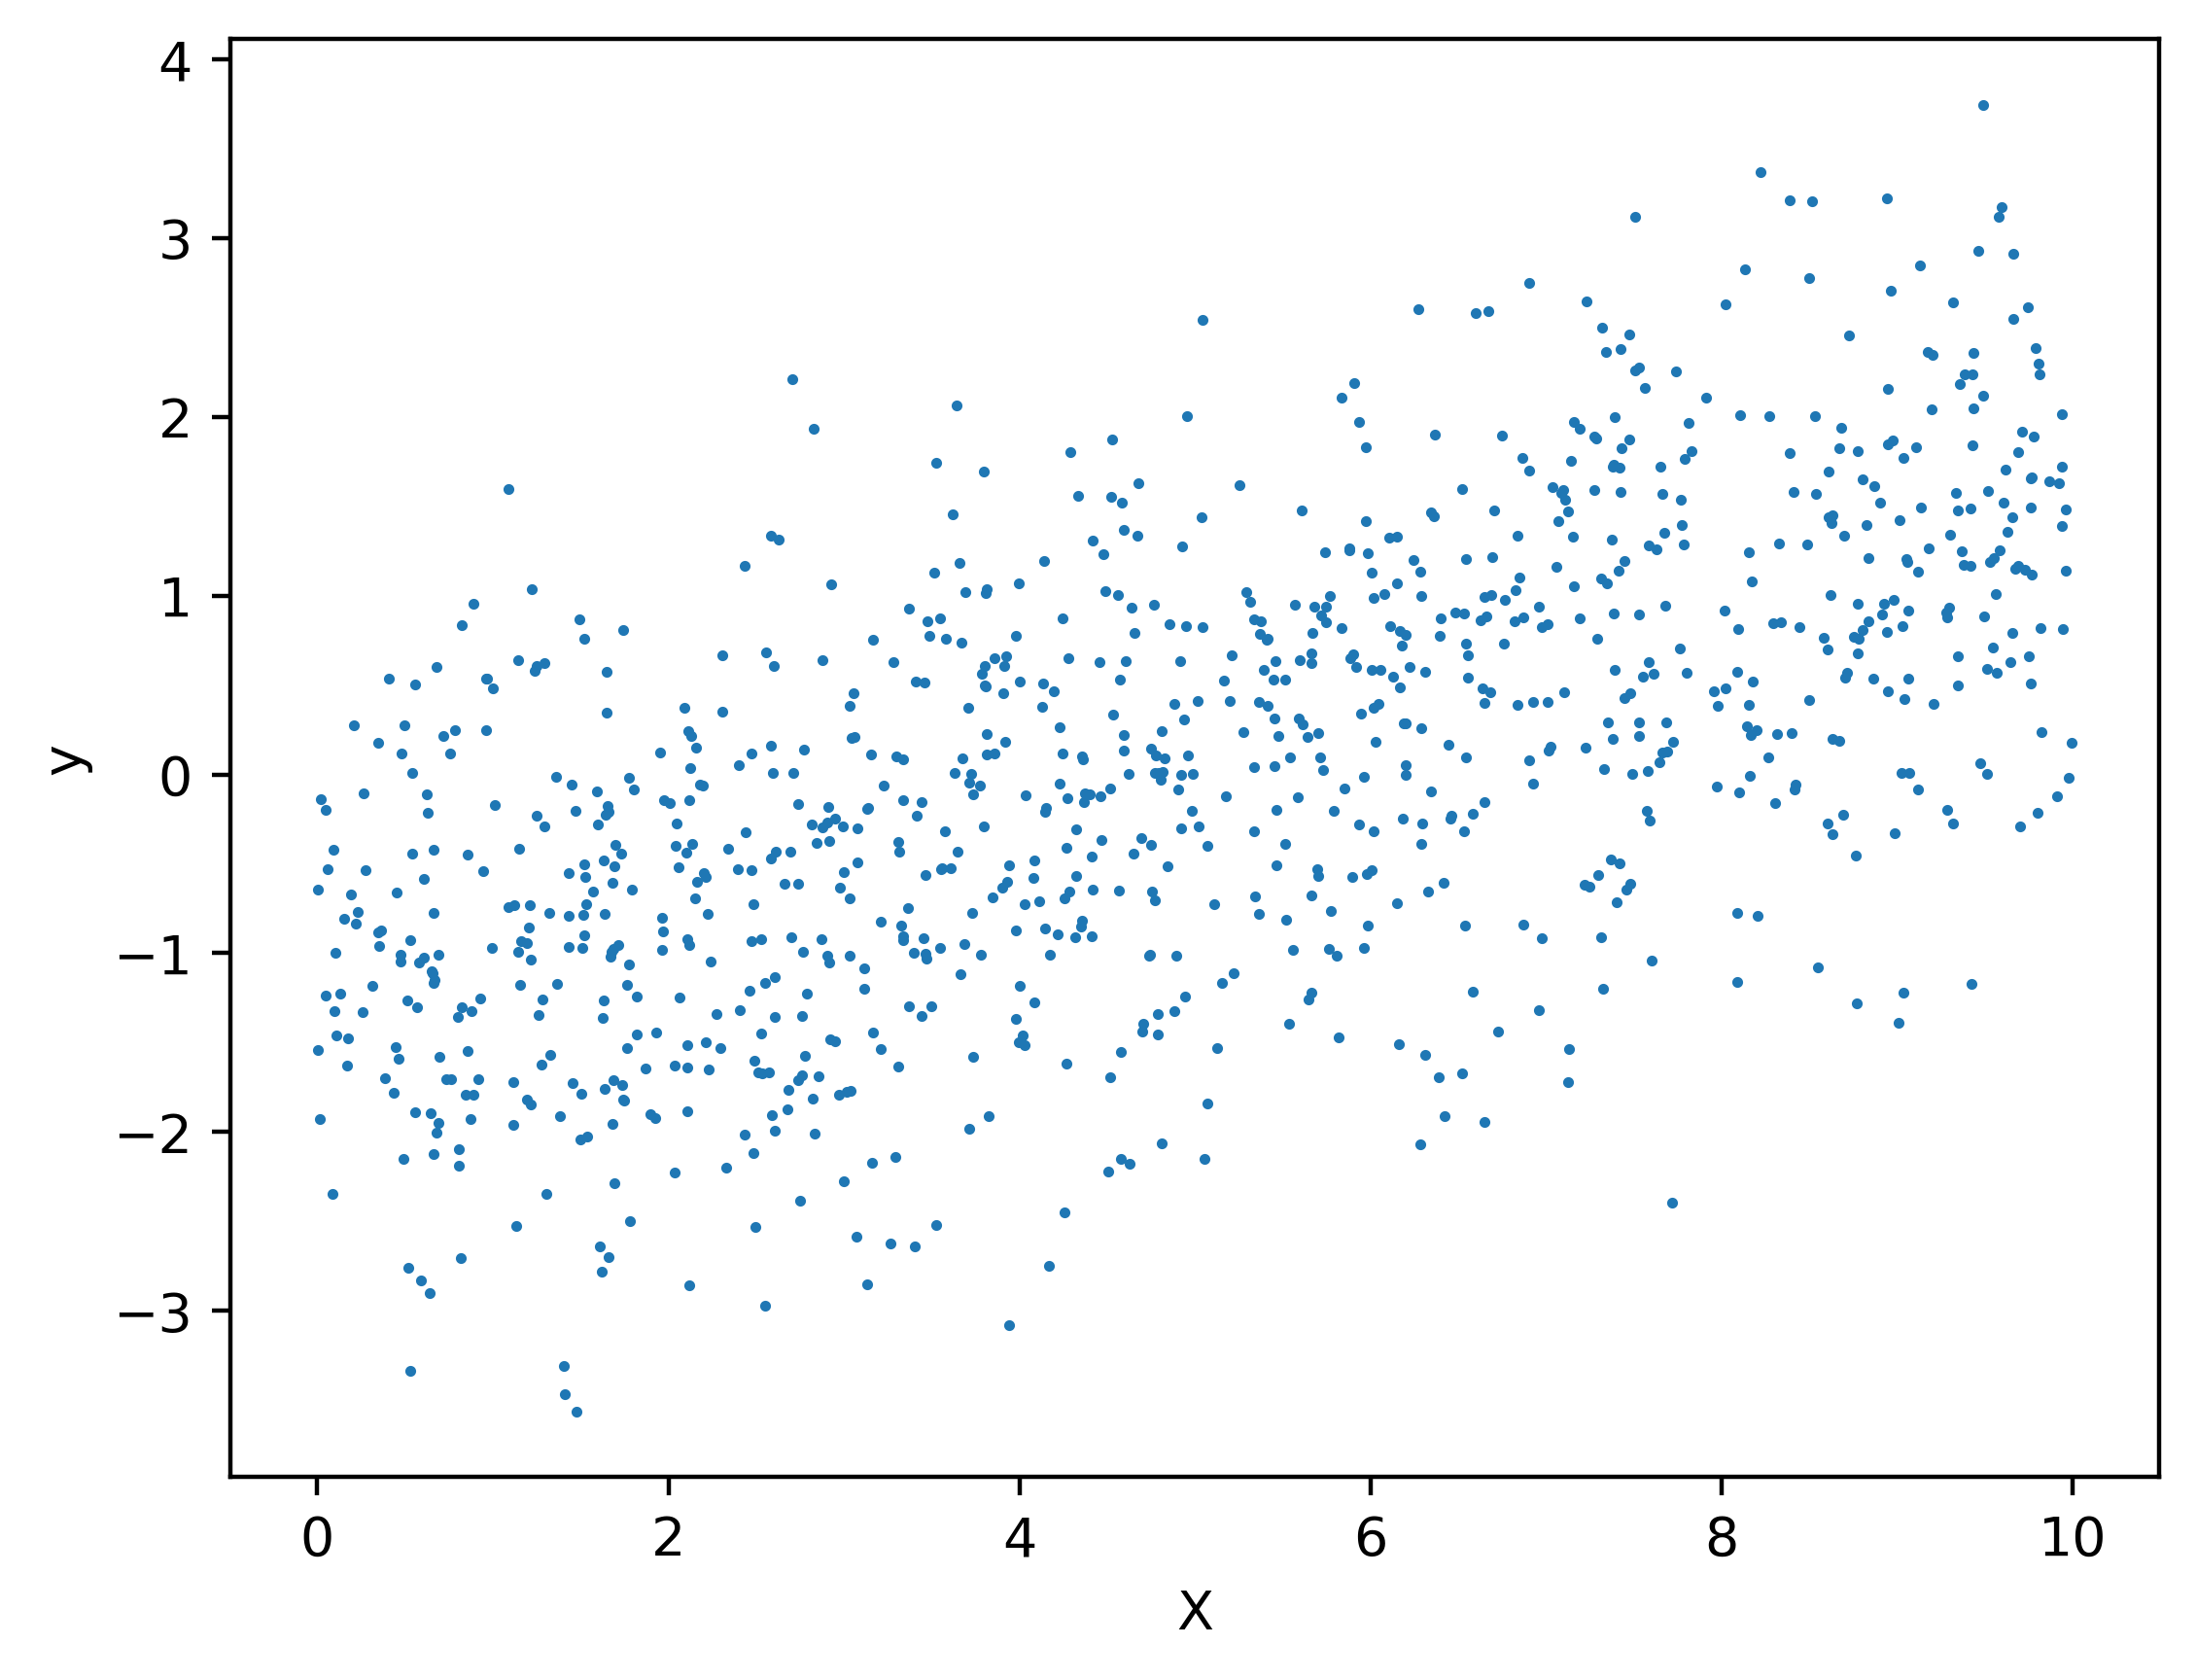

In [34]:
slope = 0.25
intercept = -1.25
#rg.normal represents the Gaussian noise, where the noise is an array of 1000 data poitns with same size as the feature X array, mean of the noise(loc) is zero and standard deviation(scale) is 1. This adds a little "spread" to the linear data
y = slope * X + rg.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

mpl.rcParams['figure.dpi'] = 400
plt.scatter(X, y, s=1)
plt.xlabel('X')
plt.ylabel('y')

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1, 1), df['default payment next month'].values, test_size=0.2, random_state=24)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)
